# UC San Diego: Neural Data Science

# Dementia prediction using MRI Data

# Permissions

Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

[ ] YES - make available
[X] NO - keep private

# Name

- Nicholas Yamashita


# Overview

In this notebook we analysed 3 datasets in 2 parts. In Part 1 we looked at survey data gathered from patients. We then plotted the information to see if there were any lifestyle links that could possibly lead-to dementia. In Part 2 we attempted to build a classifer that would be able to classify if a patient had dementia or not given an MRI image.

<a id='research_question'></a>
# Research Question

Can we use MRI & lifestyle data to early detect Alzheimers - examining MRI data, such as volumetric measurements, cortical thickness, lifestyle habits, Dementia Rating, brain volume, and functional connectivity. Using these markers we can then classify subtle brain alterations to make predictions on the patients future outcomes.

# Background & Prior Work

Currently there are 50 million people living with some form of Alzheimer's or some form of dementia [^World Health Organization]. While there is not currently no known cure, there are a few factors that can help lessen the impact of the condition including Diet, exercise, mental stimulation, cardiovascular health, and sleep [^WHO]. But the earlier the condition is caught, the more effect these attributes can be to minimizing the deteriorating condition.

A patient with a genetic predisposition to Alzheimer’s would benefit from routine checkups that would serve as a way to measure the progression of the disease. The check ups would include gathering data like brain scans, blood panels, mental fitness, diet, exercise frequency, substance use, and so on. A model can be built using this data that would serve as a predictor of the patient's future given their current lifestyle choice, thus influencing them in one way or another.

We can use CNN’s to classify MRI data [^Zahraa et. al] and thus help make some sort of prediction on the future progression of the disease. We will then attempt to extend these classifying techniques to include the lifestyle data[^Cochran at al], as well as dimensionality reduction in the case of irrelevant data within our dataset.

[^WHO]: (15 March 2023) Dementia. World Health Organization https://www.who.int/news-room/fact-sheets/detail/dementia

[^Zahraa et al]: (31 March 2022) Automatic Classification of Alzheimer's Disease using brain MRI data and deep Convolutional Neural Networks https://arxiv.org/abs/2204.00068

[^Cochrane et al]: (2 Jun 2020) Application of Machine Learning to Predict the Risk of Alzheimer's Disease: An Accurate and Practical Solution for Early Diagnostics https://arxiv.org/abs/2006.08702

# Hypothesis

We believe that proper analysis of MRI data can provide insights into the early detection and progression of Alzheimer's disease. Early detection of Alzheimers using MRI data - examining MRI data, such as volumetric measurements, cortical thickness, white matter integrity, Dementia Rating, brain volume, and functional connectivity. Using these markers we can then classify subtle brain alterations to make predictions on the patients future outcomes.

# Dataset(s)


 <br>
<b>Cross-sectional MRI Data in Young, Middle Aged, Nondemented and Demented Older Adults:</b> This set consists of a cross-sectional collection of 416 subjects aged 18 to 96. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD).<br>

 - Dataset Name: MRI and Alzheimers
 - Link to the dataset: https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers
 - Number of observations: 436


<br><br>


<b>Longitudinal MRI Data in Nondemented and Demented Older Adults:</b> This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included.<br>

 - Dataset Name: MRI and Alzheimers
 - Link to the dataset: https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers
 - Number of observations: 150
 <br><br>


<b>Alzheimer MRI Preprocessed Dataset:</b>
 - The Data is collected from several websites/hospitals/public repositories.
 - The Dataset is consists of Preprocessed MRI (Magnetic Resonance Imaging) Images.
 - All the images are resized into 128 x 128 pixels.
 - The Dataset has four classes of images.
 - The Dataset is consists of total 6400 MRI images.<br>
Class - 1: Mild Demented (896 images)<br>
Class - 2: Moderate Demented (64 images)<br>
Class - 3: Non Demented (3200 images)<br>
Class - 4: Very Mild Demented (2240 images).<br><br>

 - Dataset Name:Alzheimer MRI Preprocessed Dataset
 - Link to the dataset: https://catalog.data.gov/dataset/alzheimers-disease-and-healthy-aging-data:
 - Number of observations: 6400 images
 <br>


# Data Wrangling

### All of our datasets were preprocessed and in an organized CSV or an organized dicrectory. We did our project analysis in two sessions, we did the first section on our local host machines so we just used a simple pandas read_csv. The second section we stored the data in Google Drive for everyone to access, the dataset contained 6400 images, so we just had to mount the google drive then read in that particular directory

In [ ]:
## YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute  import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Data Cleaning

### First we read in the dataset and take a quick look at it.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

ocross = pd.read_csv("oasis_cross-sectional.csv")
olong = pd.read_csv("oasis_longitudinal.csv")

# print(ocross.head(1))
# print(olong.head(1))

print(ocross.info())
print(olong.info())

print("Highest age is ", np.max([np.max(ocross.Age), np.max(olong.Age)]), "and lowest age is ", np.min([np.min(ocross.Age), np.min(olong.Age)]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 

In [ ]:
# setting the Group column based on domain knowledge

group_map = {0:"Nondemented", 1:"Demented", 2:"Demented"}
ocross['Group'] = ocross['CDR'].map(group_map)

ocross.Group.value_counts()

Nondemented    135
Demented        30
Name: Group, dtype: int64

### Here we are dropping irrelevant columns from two DataFrames, 'ocross' and 'olong', concatenates them into a single DataFrame called 'data', renames columns, resets the index, and then prints the first row of 'data' and displays its information.

In [ ]:
# droping nan values of column Group

ocross.dropna(subset=['Group'],inplace=True)
# ocross.info()


In [ ]:
# droping some irrelevant columns

ocross.drop(columns=['ID','Delay'],inplace=True)

olong = olong.rename(columns={'EDUC':'Educ'})
olong.drop(columns=['Subject ID','MRI ID','Visit','MR Delay'],inplace=True)

data = pd.concat([ocross,olong])
data.rename(columns={"M/F" : "Gender"}, inplace=True)
# reset data index
data = data.reset_index()

print(data.head(1))
data.info()

   index Gender Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0      0      F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   

         Group  
0  Nondemented  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   538 non-null    int64  
 1   Gender  538 non-null    object 
 2   Hand    538 non-null    object 
 3   Age     538 non-null    int64  
 4   Educ    538 non-null    float64
 5   SES     513 non-null    float64
 6   MMSE    536 non-null    float64
 7   CDR     538 non-null    float64
 8   eTIV    538 non-null    int64  
 9   nWBV    538 non-null    float64
 10  ASF     538 non-null    float64
 11  Group   538 non-null    object 
dtypes: float64(6), int64(3), object(3)
memory usage: 50.6+ KB


In [ ]:
# confirming Hand column countains only one unique value

print(data.Hand.value_counts())
data.Group.value_counts()

R    538
Name: Hand, dtype: int64


Nondemented    325
Demented       176
Converted       37
Name: Group, dtype: int64

# Data Visualization Part 1

### Here we are just looking at patients with dementia vs without by gender

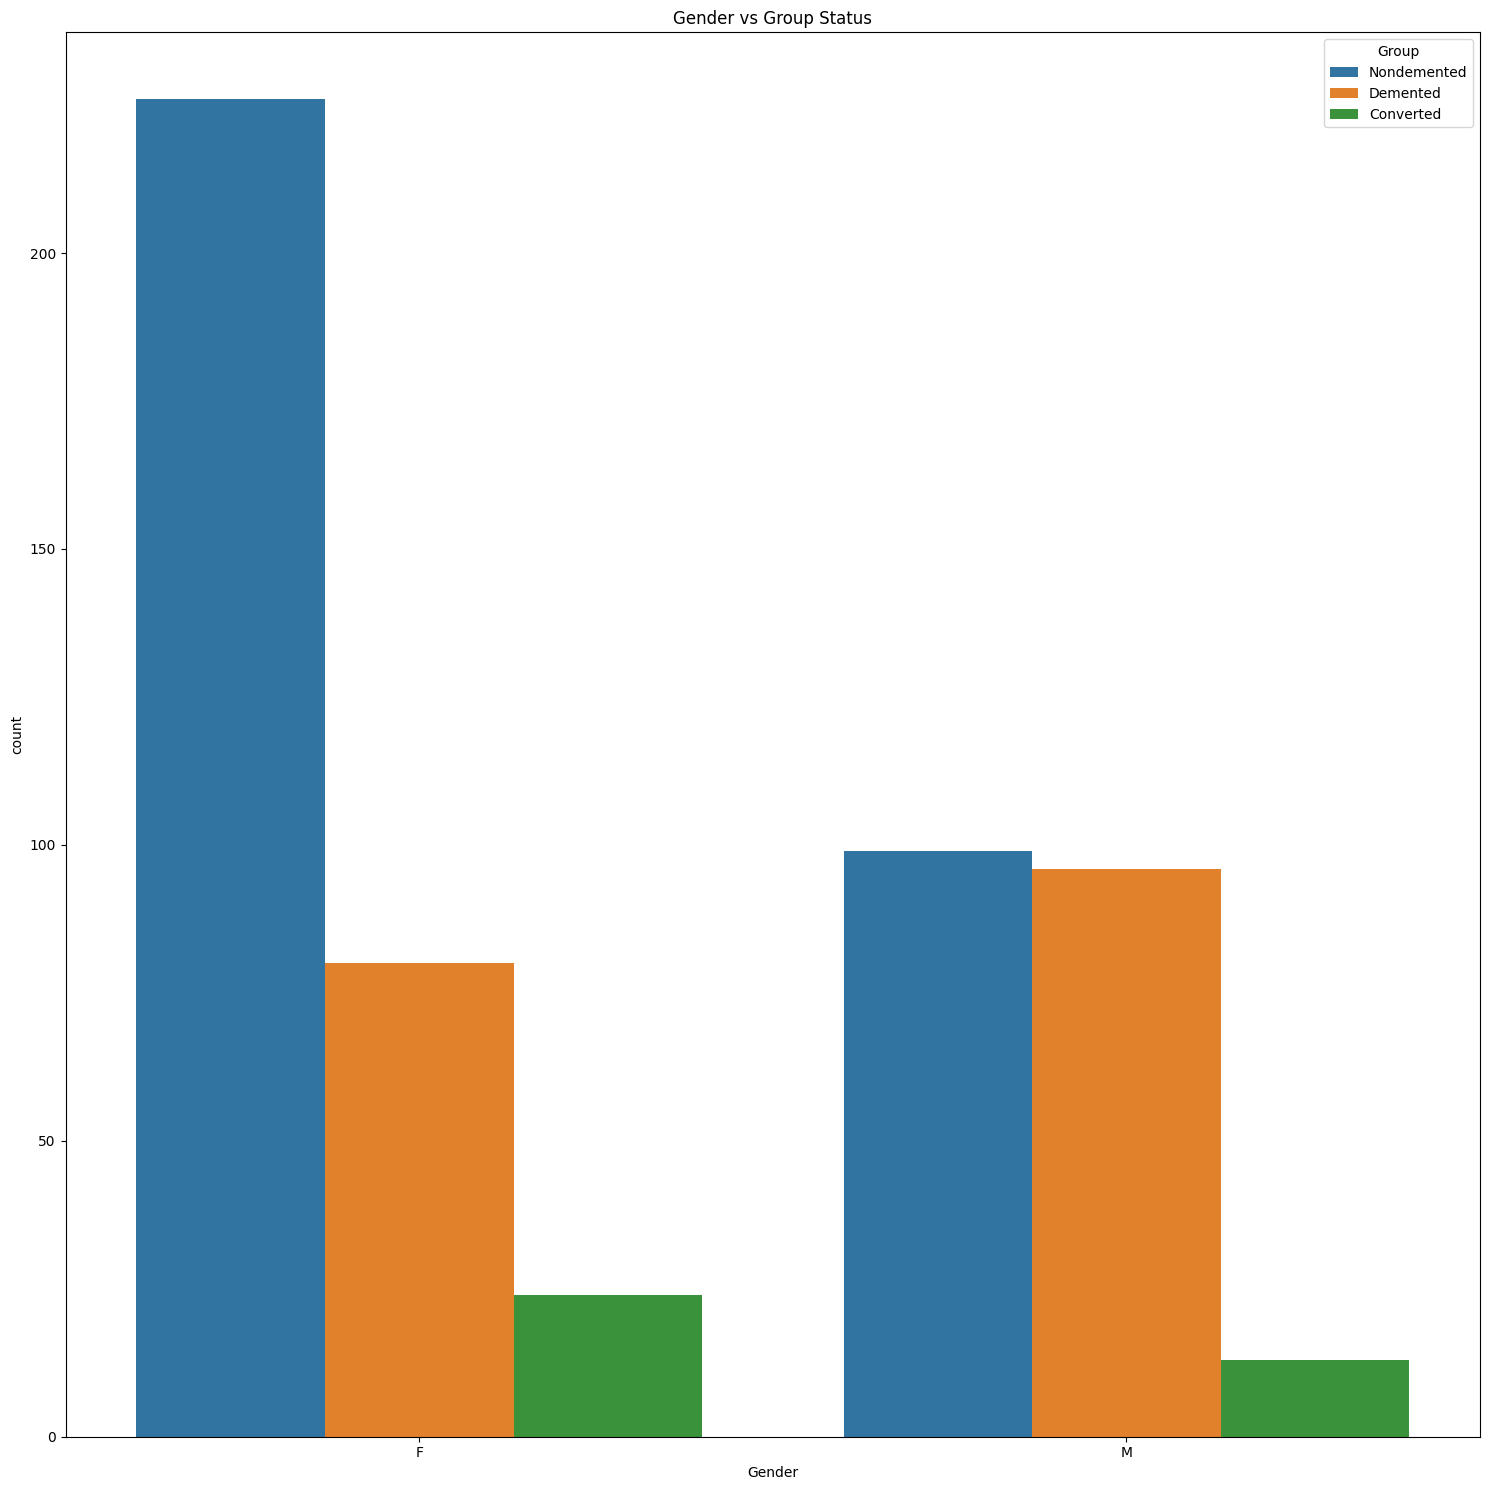

In [ ]:
working = data

sns.countplot(x="Gender", data=working, hue="Group")
plt.title("Gender vs Group Status")
plt.show()
# more men are demented than women

### Here we are plotting dementia vs education

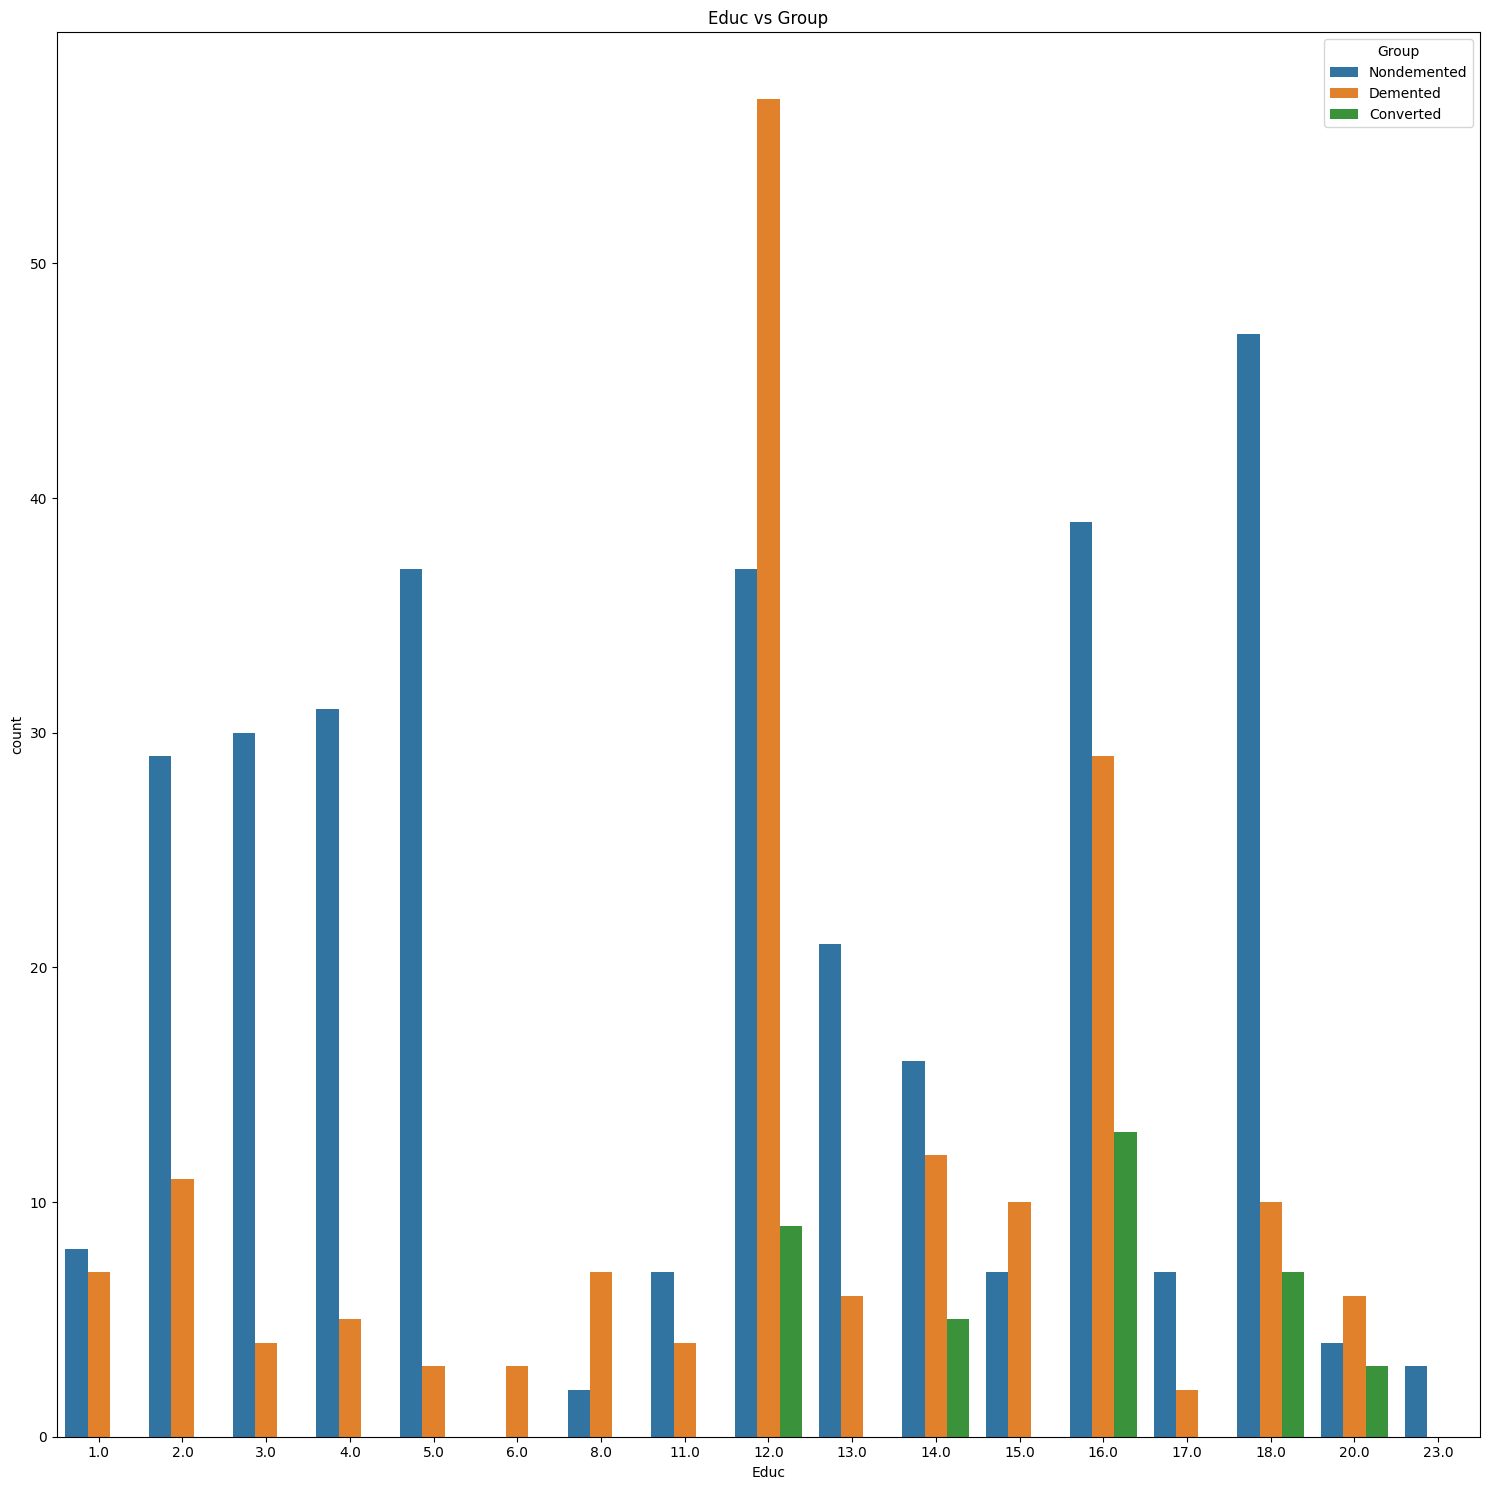

In [ ]:
sns.countplot(x="Educ", hue="Group", data=working)
plt.title("Educ vs Group")
plt.show()

### We again are viewing the Years of education vs Dementia using a Kernel Density Estimation plot for perhaps a better representation.

<ipython-input-76-e31ddf50b342>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Educ', shade=True, hue='Group', data=data)


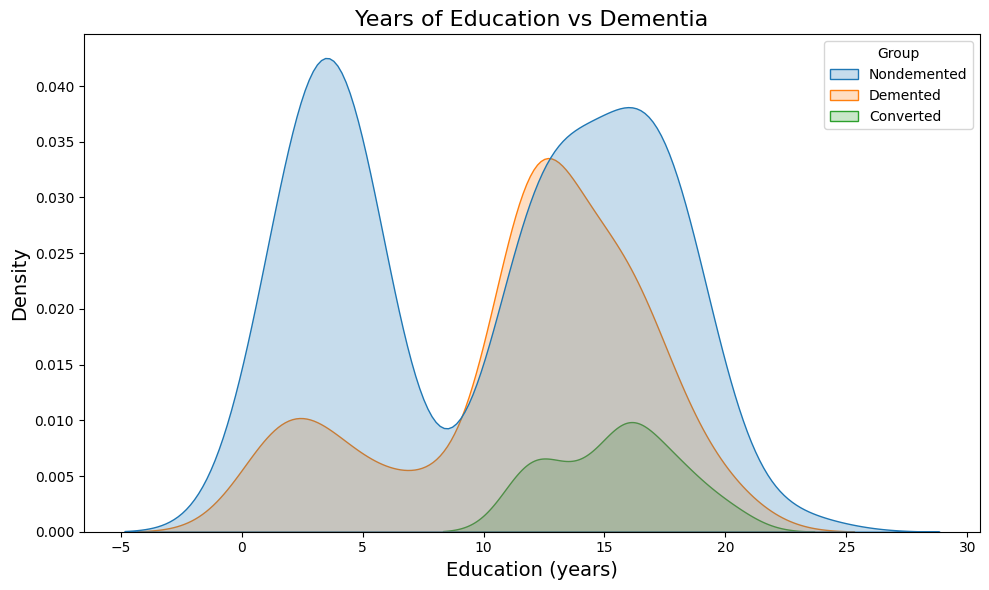

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='Educ', shade=True, hue='Group', data=data)
plt.title('Years of Education vs Dementia', size=16)
plt.xlabel('Education (years)', size=14)
plt.ylabel('Density', size=14)
plt.show()


### We were curious to see how many patiens had dementia vs not.

<Axes: xlabel='Group', ylabel='count'>

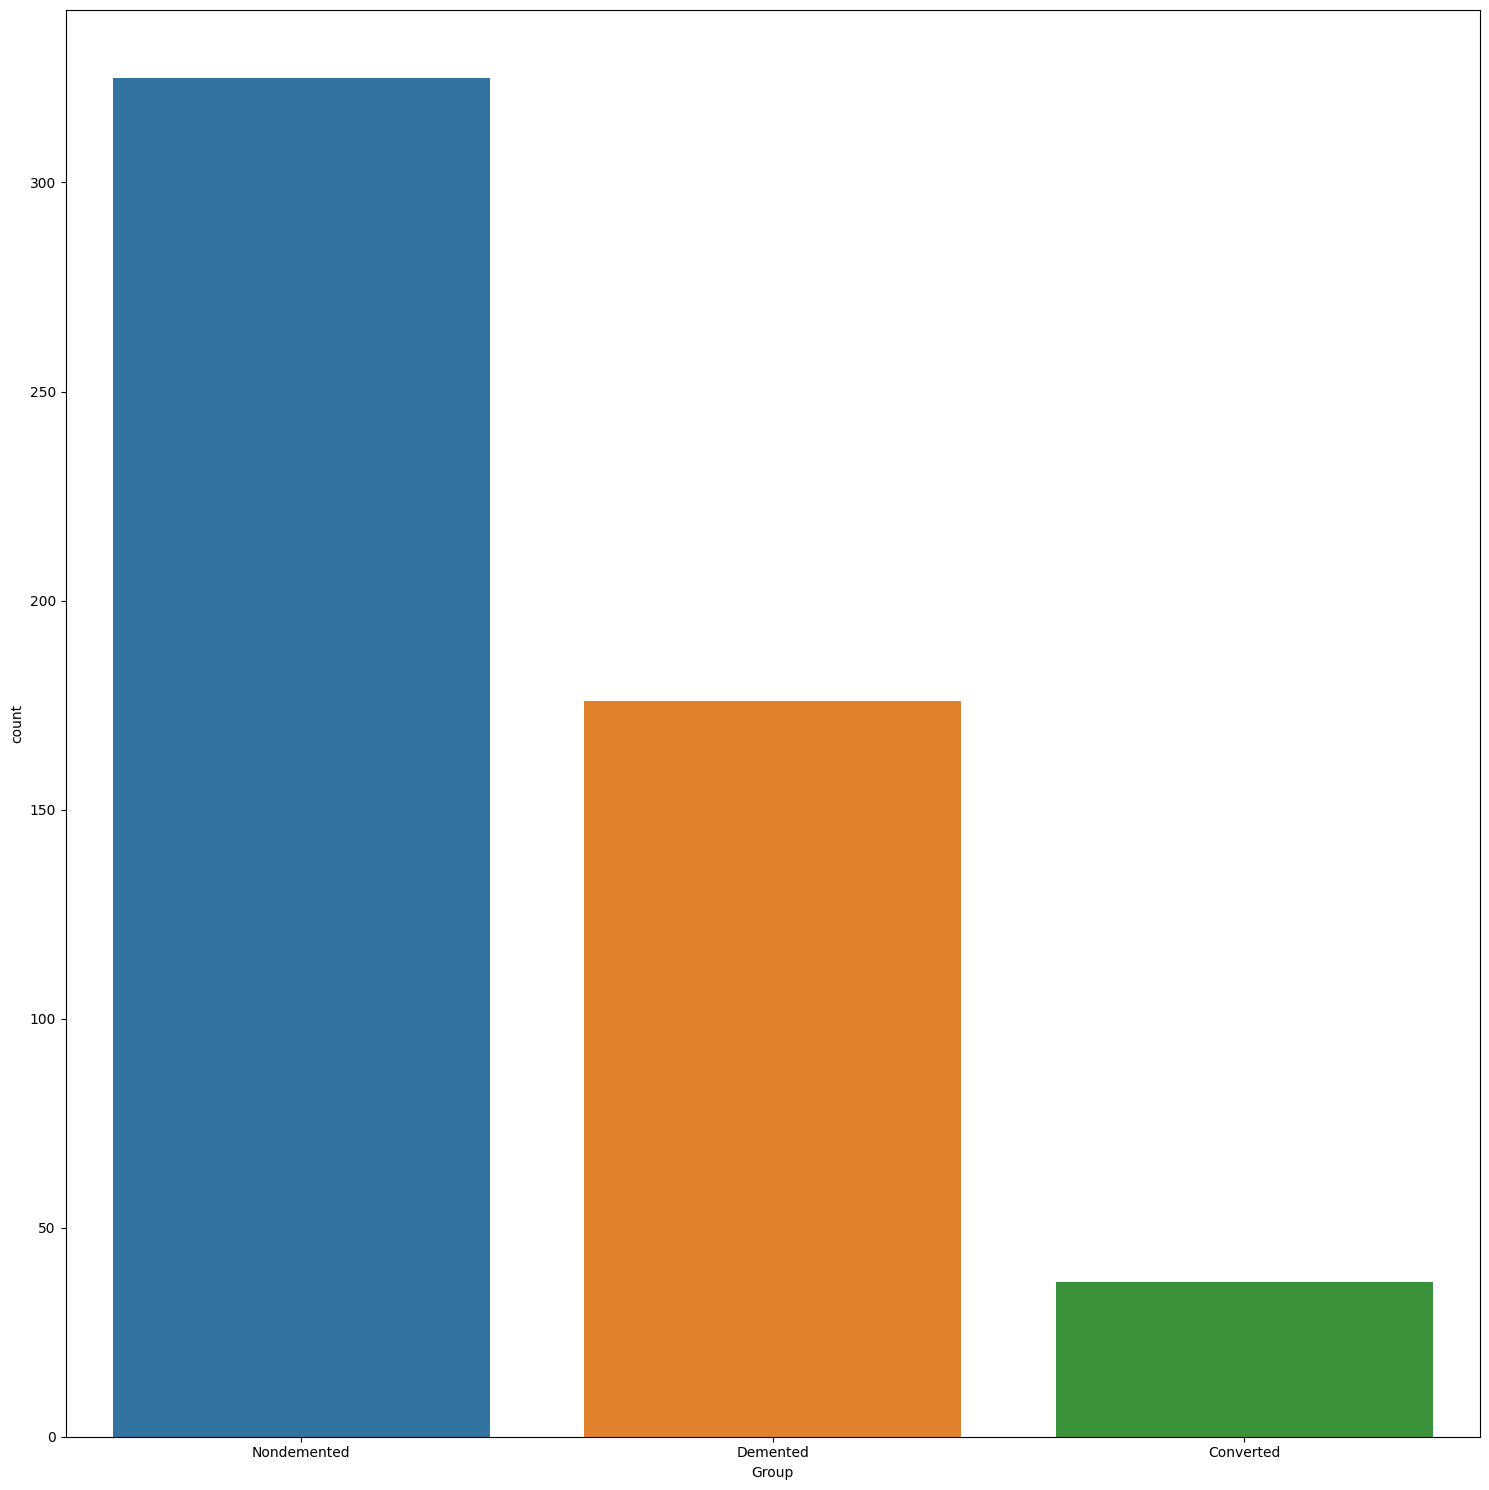

In [ ]:
sns.countplot(x="Group", data=working)

# shows there are more nondemented in the dataset

In [ ]:
# imputing wth the most occurrance
imputer = SimpleImputer ( missing_values = np.nan,strategy='most_frequent')

imputer.fit(data[['SES']])
data[['SES']] = imputer.fit_transform(data[['SES']])

# imputing with the median
imputer = SimpleImputer ( missing_values = np.nan,strategy='median')

imputer.fit(data[['MMSE']])
data[['MMSE']] = imputer.fit_transform(data[['MMSE']])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   538 non-null    int64  
 1   Gender  538 non-null    object 
 2   Hand    538 non-null    object 
 3   Age     538 non-null    int64  
 4   Educ    538 non-null    float64
 5   SES     538 non-null    float64
 6   MMSE    538 non-null    float64
 7   CDR     538 non-null    float64
 8   eTIV    538 non-null    int64  
 9   nWBV    538 non-null    float64
 10  ASF     538 non-null    float64
 11  Group   538 non-null    object 
dtypes: float64(6), int64(3), object(3)
memory usage: 50.6+ KB


### Using pairplot to visualise each feature against every other feature

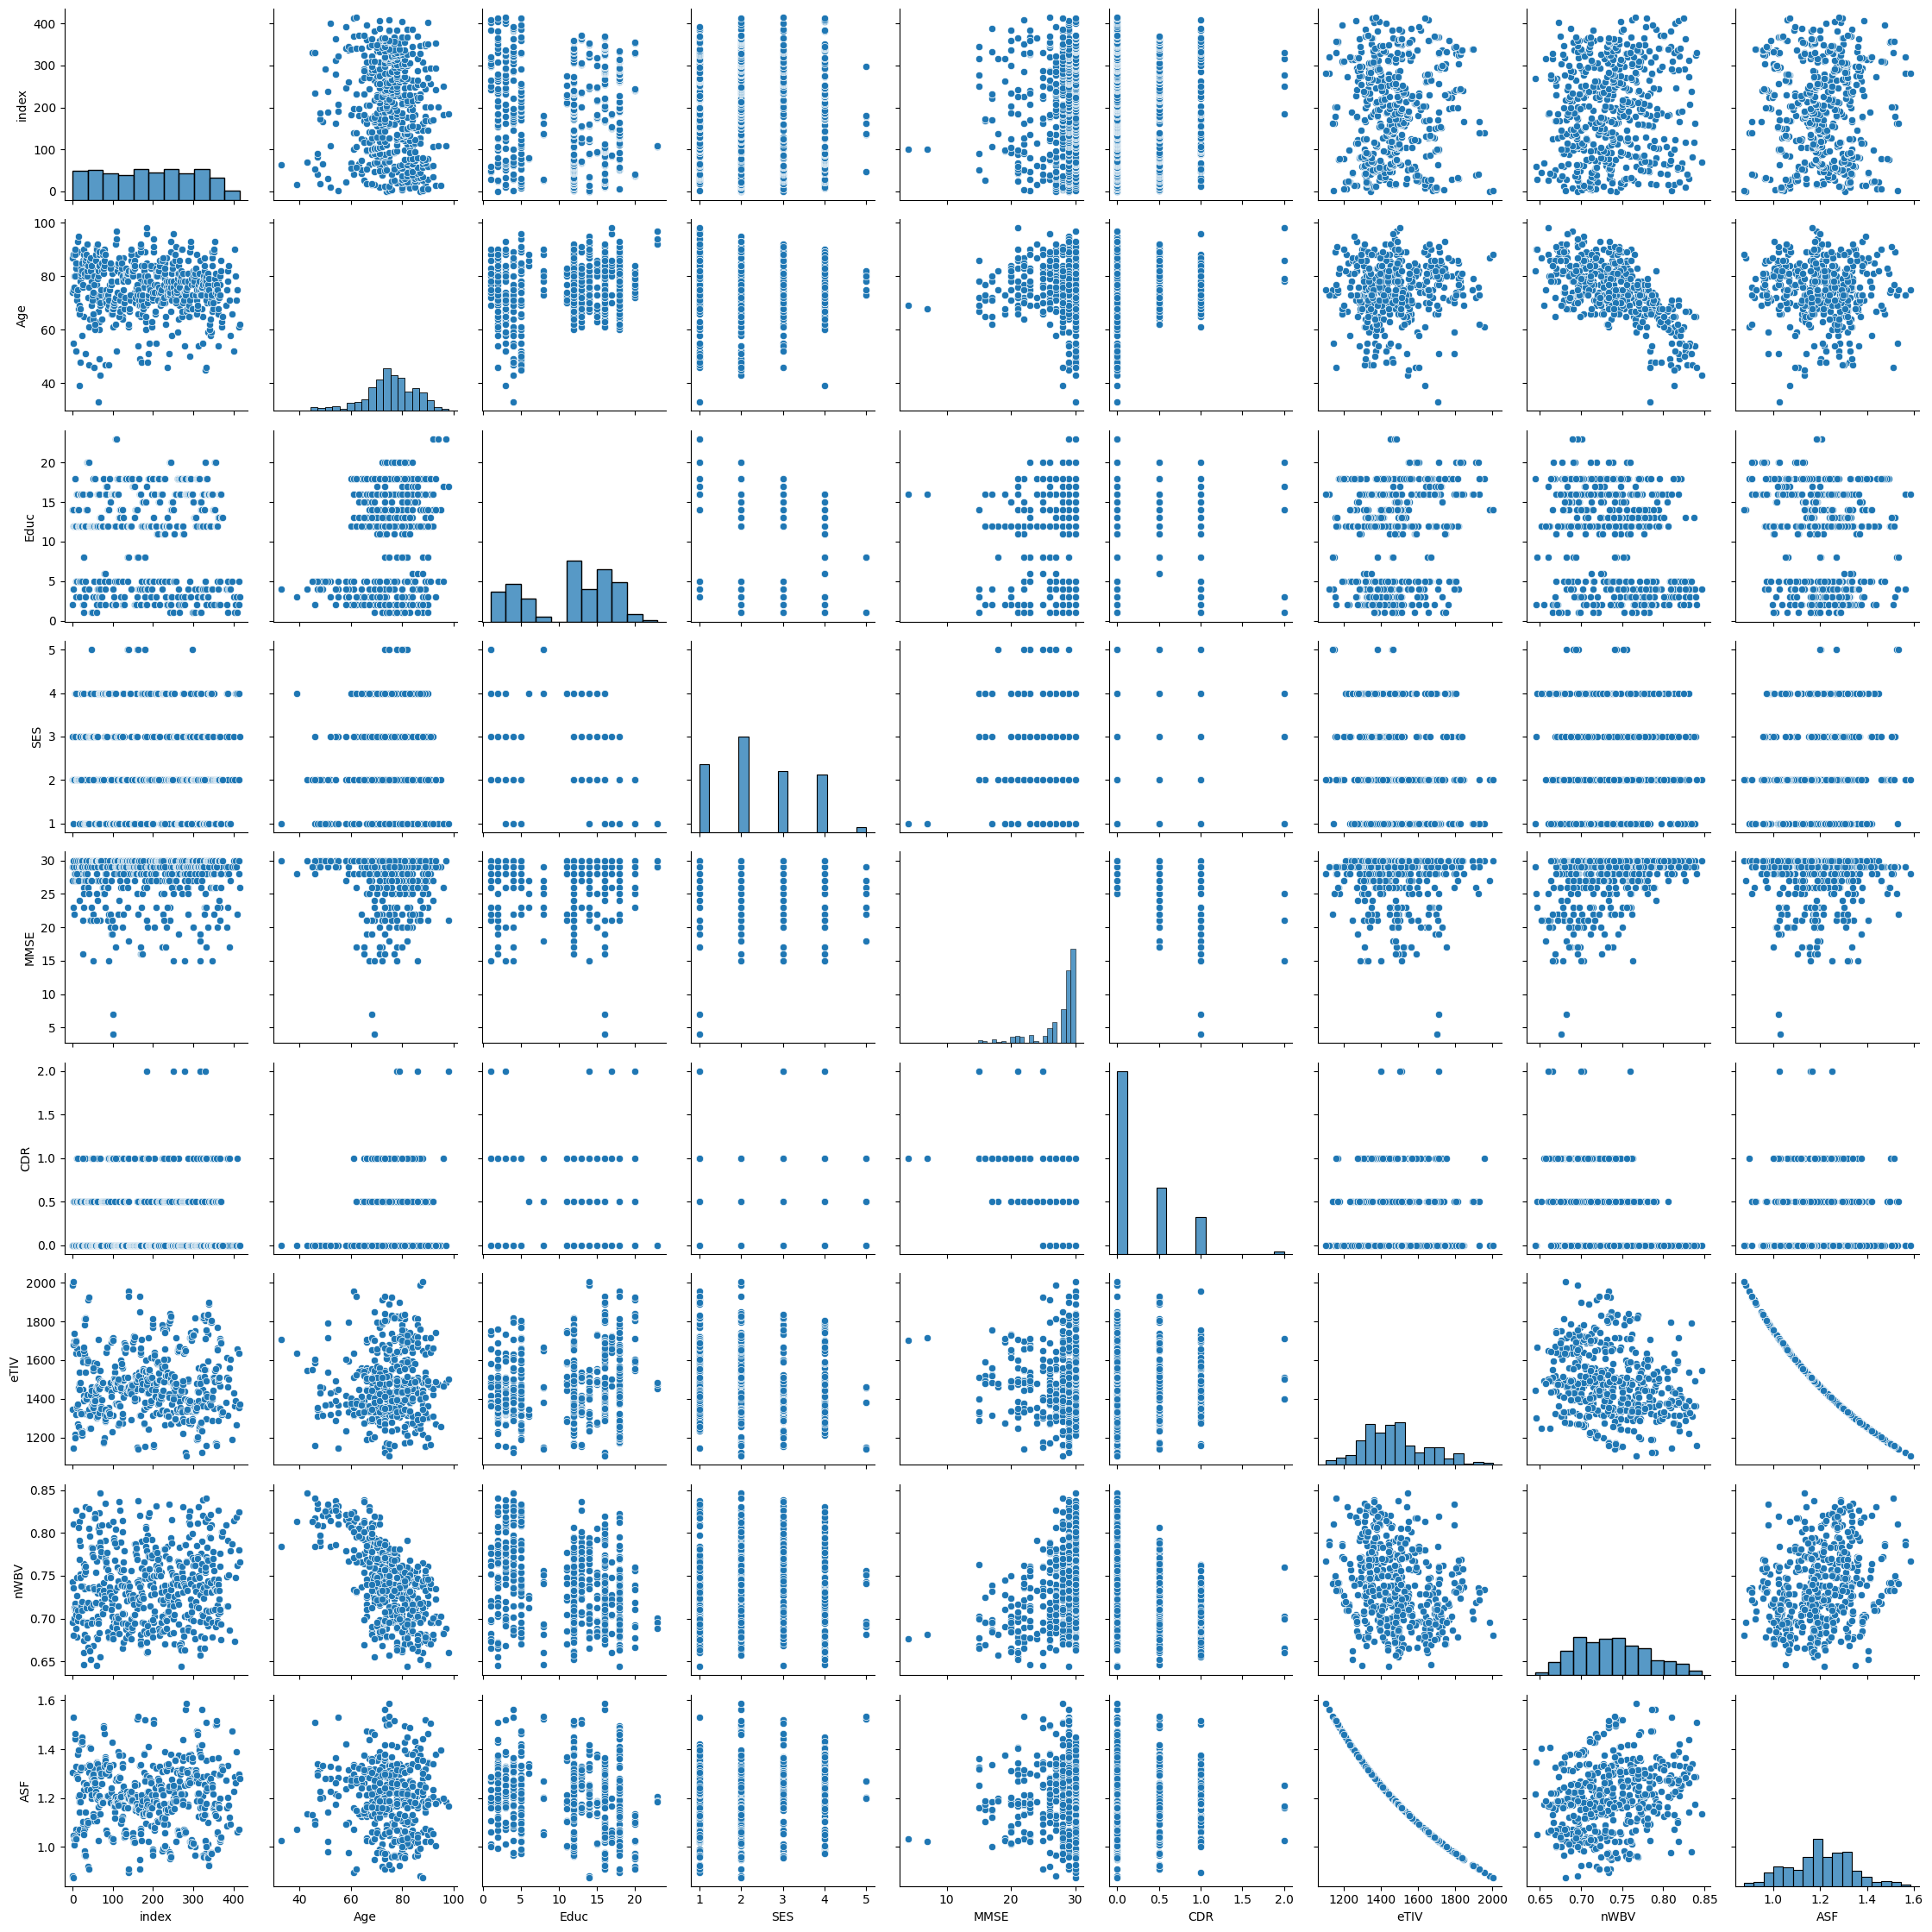

In [ ]:
# using pairplot to visualise each feature against every other feature
sns.pairplot(data)

### Relationship Between Age and Normalized Whole Brain Volume
 - Group: 0 = Nondemented
 - 1 = Demented

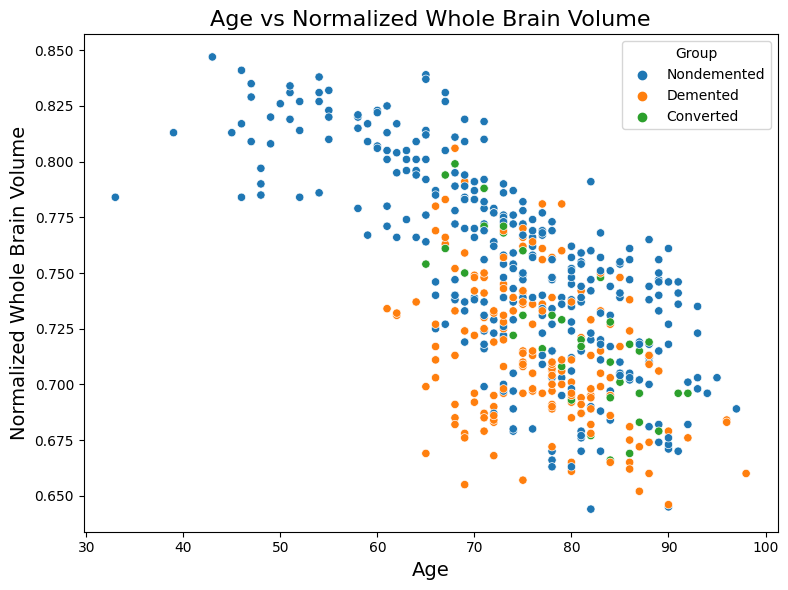

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='nWBV', data=data, hue='Group')
plt.title('Age vs Normalized Whole Brain Volume', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Normalized Whole Brain Volume', size=14)
plt.show()

In [ ]:
# converting categorical features to numerical values

data["Gender"] = np.where(data["Gender"] == 'F', 1, 0)
data["Hand"] = np.where(data["Hand"] == 'R', 1, 0)
data["Group"] = np.where(data["Group"] == 'Demented', 1, 0)

cor = data.corr()

In [ ]:
# dropping extra features
data.drop(columns=["Hand", "CDR"], inplace=True)

In [ ]:
# dividing data into descriptive and target features
y = data.pop('Group')
data.pop("index")
x = data

# since the ranges of the descriptive features are different we normalize them


x = StandardScaler().fit_transform(x)

# Data Analysis & Results of Part 1


#### 1) There seems to be a higher rate of dementia in males than in females

#### 2) There is a negative correlation with Normalized Whole Brain Volume. There is more of a negative correlation in patients with dementia.

#### 3) It seems overall patients with dementia had less education.

# Part 2 - Dementia Classification

### In this section we will now include the 6400 MRI image data, and our goal here is to be able to classify dementia.


# Getting a feel for a few differnt models

### Spliting the dataset into testing and training

In [ ]:
# spliting the data into test and train datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0,test_size=0.2)


### Trying a few different models to see which works best

#### We are choosing to include a Logistic Regression model as it is a linear classification model that predicts the probability of an instance belonging to a certain class. It can handle binary as well as multiclass classification problems.
#### Random Forest Classifier model as it is an ensemble learning method that combines multiple decision trees to make predictions. Each tree in the random forest is trained on a random subset of the data and features. It can handle both classification and regression tasks and is known for its ability to handle high-dimensional data and capture complex relationships.
#### Gradient Boosting Classifier because it is also an ensemble learning method that combines multiple weak prediction models, typically decision trees, to create a strong predictive model. It builds the models sequentially, where each subsequent model focuses on correcting the mistakes made by the previous models. Gradient boosting is known for its high accuracy and ability to handle complex datasets.
#### And finally a Support Vector Classifier because it is a supervised machine learning algorithm that uses support vectors to perform classification tasks. It finds the optimal hyperplane that best separates the data points of different classes. SVC can handle both linear and non-linear classification problems and is particularly effective in high-dimensional spaces.

In [ ]:
# Model selection

model = LogisticRegression()
model1 = RandomForestClassifier()
model2 = GradientBoostingClassifier()
model3 = SVC()


model.fit(x_train, y_train)
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

### Here we create a table with model names and their accuracy scores, formatted as percentages, and visualizes it using matplotlib's table function.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


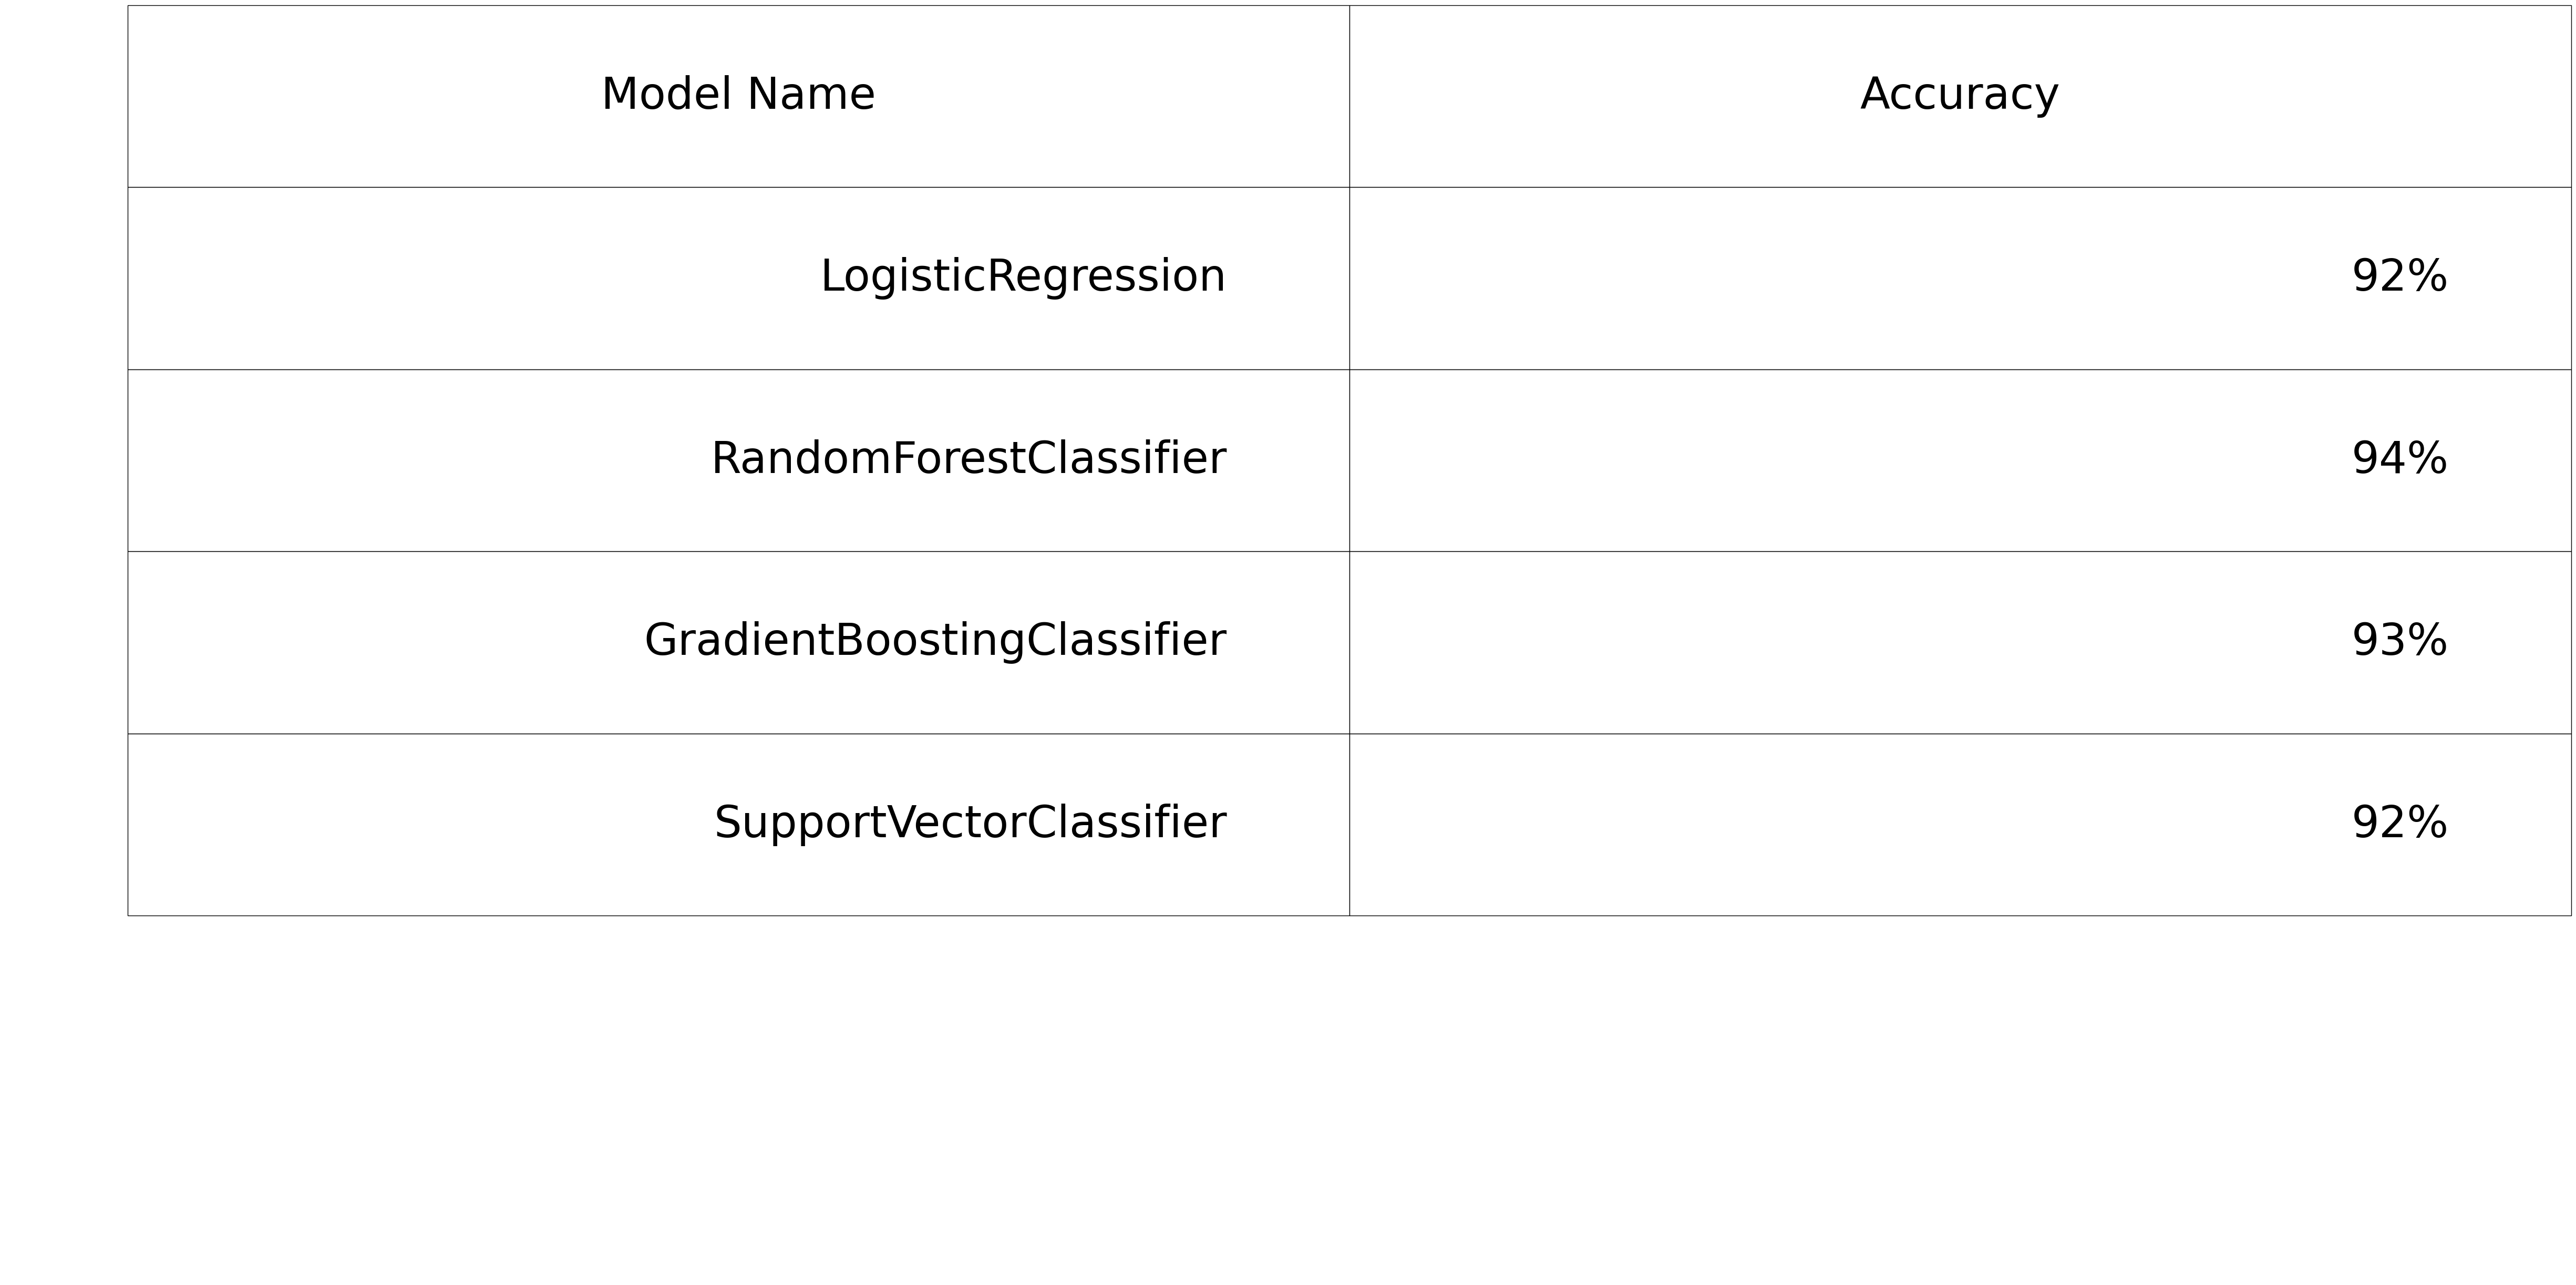

In [ ]:
table = [
    [ "LogisticRegression","{:.0%}".format(model.score(x_test, y_test))],
    ["RandomForestClassifier", "{:.0%}".format(model1.score(x_test, y_test))],
    ["GradientBoostingClassifier", "{:.0%}".format(model2.score(x_test, y_test))],
    ["SupportVectorClassifier", "{:.0%}".format(model3.score(x_test, y_test))],
]
plt.rcParams["figure.figsize"] = [15.00, 15.0]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

columns = ("Model Name", "Accuracy")
ax.axis('tight')
ax.axis('off')
tab = ax.table(cellText=table, colLabels=columns, loc=4, bbox=(0.2,0.6,4,1.5))
tab.auto_set_font_size(False)
tab.set_fontsize(60)
plt.show()

# The best is RandomForestClassifier

In [ ]:
# comparing predicted with actual value
pred = model1.predict(x_test)

comp = pd.DataFrame({"Real": y_test, "Predicted": pred})
print(comp)

     Real  Predicted
172     0          0
468     0          0
196     0          0
416     1          1
534     1          1
..    ...        ...
493     1          1
225     1          1
336     1          1
443     0          1
10      0          0

[108 rows x 2 columns]


# Data Wrangling Part 2

#### We will be using Tensorflow Keras. We tried training the model on our laptops but we were under powered. We then chose to use Google Colab for the TPU/GPU's. The model took around an hour to train. We uploaded the dataset into Drive, then mounted and read-in the data.

Prediction Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os
import tqdm
import glob
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import RandomRotation, RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import applications
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory

from sklearn.svm import SVC

In [ ]:
!pip install git+https://github.com/jfilter/split-folders.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/jfilter/split-folders.git to /tmp/pip-req-build-lgi322hx
  Running command git clone --filter=blob:none --quiet https://github.com/jfilter/split-folders.git /tmp/pip-req-build-lgi322hx
  Resolved https://github.com/jfilter/split-folders.git to commit c566dbd56a1097e1ddba2de5dfb93bd67eade54f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
#moutn
from google.colab import drive
import os


In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Replace 'Folder/Subfolder' with the actual path to your folder
folder_path = '/content/drive/MyDrive/Dataset'
os.chdir(folder_path)


In [ ]:
file_list = os.listdir('.')
print(file_list)


['.DS_Store', 'Mild_Demented', 'Non_Demented', 'Moderate_Demented', 'Very_Mild_Demented']


### Here we are splitting our data into train and test. Our data contains four different classes, ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [ ]:
import splitfolders

input_folder=folder_path

output_folder='/content/drive/MyDrive/Dataset/Split'

train_ratio=0.8
validation_ratio=0.1
test_ratio=0.1
splitfolders.ratio(input_folder, output_folder, seed=42,
                   ratio=(train_ratio,
                          validation_ratio,
                          test_ratio))

Copying files: 6400 files [04:37, 23.10 files/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE=16
IMG_SIZE=(128,128)
SEED=1345

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0,
                                zoom_range=0.2)

validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


#Defining directories for train,validation,test
train_dir = '/content/drive/MyDrive/Dataset/Split/train'
validation_dir = '/content/drive/MyDrive/Dataset/Split/val'
test_dir = '/content/drive/MyDrive/Dataset/Split/test'


#Defining generatores for train,validation,test

train_generator=train_datagen.flow_from_directory(
    train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        seed = SEED,
        shuffle=True,
        batch_size=64,
        class_mode ='categorical',)

# Define generator for test set using flow_from_directory
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size =64,
        class_mode ='categorical',
)

Found 5119 images belonging to 4 classes.
Found 639 images belonging to 4 classes.
Found 642 images belonging to 4 classes.


In [ ]:
class_names=list(train_generator.class_indices.keys())
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


In [ ]:
train_generator

# Data Visualization 2

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


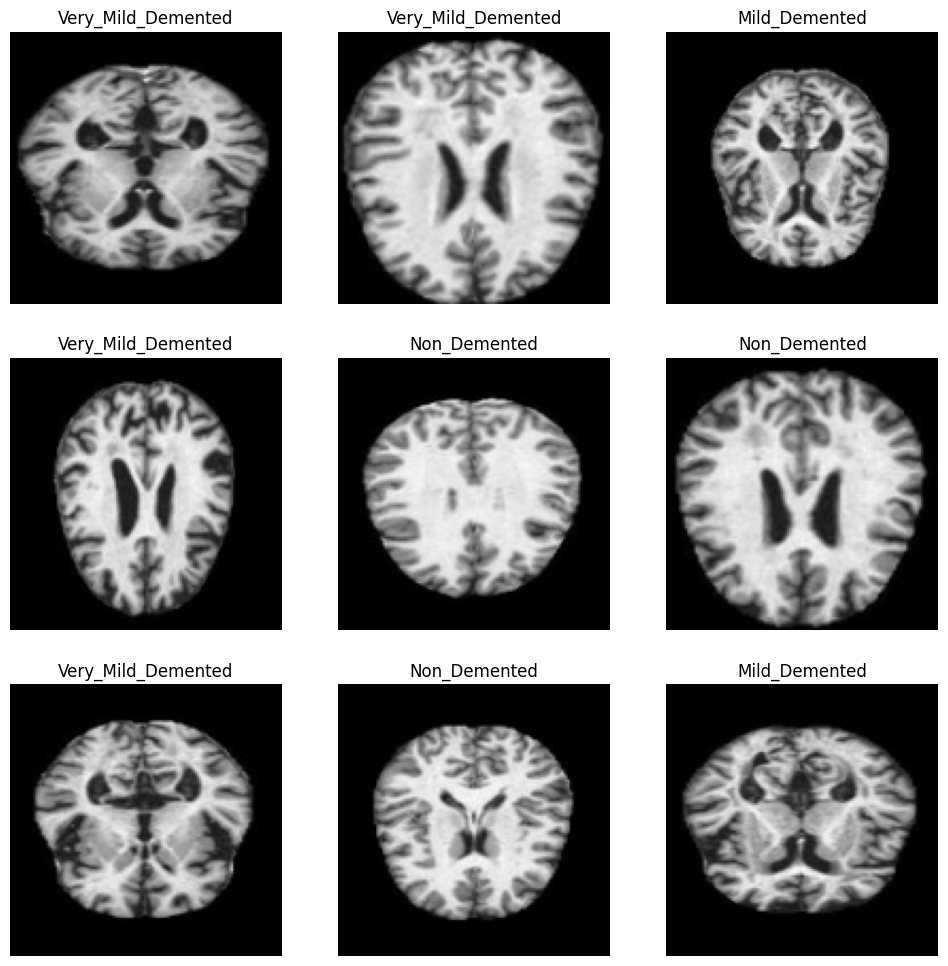

In [ ]:
plt.figure(figsize=(12,12))

for images,labels in train_generator:
#     print(images)
#     print(len(labels))
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        print(images[i].shape)
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    break

In the next few steps we:

    Define a function for data augmentation using Sequential model

    Create a Sequential model for data augmentation

    Add a RandomRotation layer with rotation factor between -0.15 and 0.15

    Add a RandomZoom layer with zoom factor between -0.3 and -0.1

    Return the data augmentation model


    Create the data augmentation model

    Assert the properties of the data augmentation layers

    Set the input folder path

    Create a dictionary to store the count of classes

    Calculate the count of files in each class folder

    Plot a bar graph to visualize the data imbalance

    Set the axis labels


In [ ]:
def data_augmentar():
    data_augmentation = Sequential()
    data_augmentation.add(RandomRotation(factor=(-0.15, 0.15)))
    data_augmentation.add(RandomZoom((-0.3, -0.1)))
    return data_augmentation

In [ ]:
data_augmentation = data_augmentar()
assert(data_augmentation.layers[0].name.startswith('random_rotation'))
assert(data_augmentation.layers[0].factor == (-0.15, 0.15))
assert(data_augmentation.layers[1].name.startswith('random_zoom'))
assert(data_augmentation.layers[1].height_factor == (-0.3, -0.1))

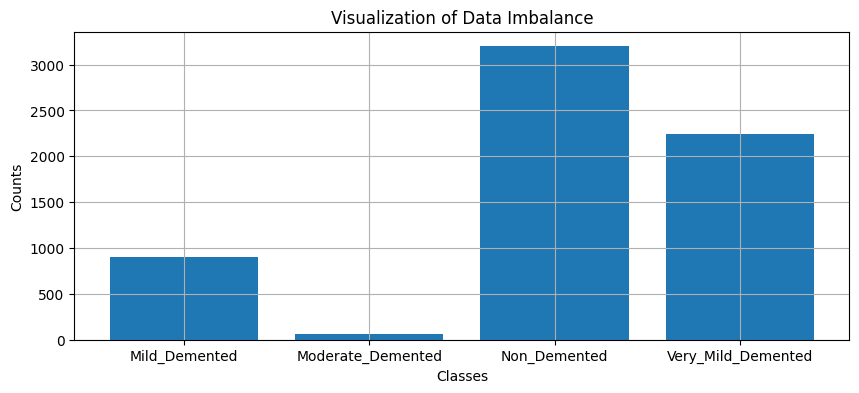

In [ ]:
input_folder=folder_path

class_count=dict()

for i in class_names:
    class_count[i]=len(os.listdir(input_folder+'/'+i))

plt.figure(figsize=(10,4))
plt.bar(class_count.keys(),class_count.values())

plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Visualization of Data Imbalance')
plt.grid(True)
plt.show()

### We can see that the bulk of our data is non and very mild demented patients

#### Calculate and print the weight for each class in the dataset based on the total number of samples and the counts of samples in each class. The class weight is a measure that can be used to handle class imbalance

In [ ]:
total_samples=sum(class_count.values())

for i in range(4):
    class_weight = round(total_samples / (4 * list(class_count.values())[i]), 2)
    print(f'Weight for class \"{class_names[i]}\" : {class_weight}')

Weight for class "Mild_Demented" : 1.79
Weight for class "Moderate_Demented" : 25.0
Weight for class "Non_Demented" : 0.5
Weight for class "Very_Mild_Demented" : 0.71


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

IMG_HEIGHT = 128
IMG_WIDTH = 128

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

### This creates an instance of the VGG19 model, initializes it with pre-trained weights, and then uses this model to generate features from the input data using three different data generators (train_generator, validation_generator, and test_generator).

In [ ]:
input_shape = (128,128, 3)

#Create an instance of the VGG19 model
vgg19 = VGG19(include_top=False, input_shape=input_shape,
                   weights='imagenet')

train_features = model.predict(train_generator, steps=len(train_generator), verbose=1)
val_features=model.predict(validation_generator,len(validation_generator),verbose=1)
test_features = model.predict(test_generator, steps=len(test_generator), verbose=1)

11/11 [==============================] - 4s 369ms/step


In [ ]:
train_labels=train_generator.classes
val_labels=validation_generator.classes
test_label=test_generator.classes

In [ ]:
trainval_features = np.concatenate((train_features, val_features))
trainval_labels = np.concatenate((train_labels, val_labels))

In [ ]:
trainval_features.shape

(5758, 4)

In [ ]:
X_train_2d = trainval_features.reshape(trainval_features.shape[0], -1)

In [ ]:
X_test_2d = test_features.reshape(test_features.shape[0], -1)

In [ ]:
X_train_2d.shape

(5758, 4)

In [ ]:
train_labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

**This generates a random permutation of indices and uses those indices to shuffle the elements of two arrays, X_train_2d and trainval_labels, creating shuffled versions of the arrays shuffled_X_train and shuffled_X_labels.**

In [ ]:
indices = np.random.permutation(5700)

# Shuffle X_train and X_labels using the same indices
shuffled_X_train = X_train_2d[indices]
shuffled_X_labels = trainval_labels[indices]

In [ ]:
import xgboost as xgb
from sklearn.svm import SVC

**Here we essentially performs grid search cross-validation to find the best hyperparameters (C and kernel) for an SVM model using the polynomial kernel. It fits the model with different hyperparameter combinations and evaluates their performance using the provided kernel matrix and shuffled labels.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics.pairwise import polynomial_kernel

# Generate the kernel matrix using the polynomial kernel
kernel_matrix = polynomial_kernel(shuffled_X_train)

param_grid = {
    'C': [1, 3, 5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
}

# Perform grid search cross-validation
svc_model = SVC()
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=3)
grid_search.fit(kernel_matrix, shuffled_X_labels)


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 3, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                    'precomputed']})

In [ ]:
# Get the best parameters and best score found during grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'C': 1, 'kernel': 'linear'}
0.5052631578947369


In [ ]:
#Creatig new XGB Model with best parameters
best_xgb = SVC(**best_params)
best_xgb.fit(shuffled_X_train, shuffled_X_labels)

SVC(C=1, kernel='linear')

In [ ]:
best_xgb.score(X_test_2d,test_label)

0.4984423676012461

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


# Make predictions on the test data
y_pred = best_xgb.predict(X_test_2d)

# Compute the confusion matrix
cm = confusion_matrix(test_label, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute the classification report
report = classification_report(test_label, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[  0   0  91   0]
 [  0   0   7   0]
 [  0   0 320   0]
 [  0   0 224   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.00      0.00      0.00         7
           2       0.50      1.00      0.67       320
           3       0.00      0.00      0.00       224

    accuracy                           0.50       642
   macro avg       0.12      0.25      0.17       642
weighted avg       0.25      0.50      0.33       642



# Data Analysis & Results of Part 2

#### These results suggests that the model struggled to correctly classify samples from classes 0, 1, and 3, while it performed relatively better for class 2. The overall performance of the model on the test set is modest, with an accuracy of 0.50 and varying performance metrics across different classes. I believe it might be due to 2 main factors.
 - We need more data
 - We need a more even dataset, our dataset favoured 2 types out of 4.

# Conclusion & Discussion

#### "Our original question was 'Can we use MRI & lifestyle data to early detect Alzheimer's?' Given our results from Part 1, to prevent dementia, you would ideally continue to educate yourself throughout life to stimulate your brain, not smoke or drink, eat healthy, and be female. In Part 2, we didn't achieve a great accuracy score, so our classifier is currently no better than flipping a coin. If we had more evenly distributed data, we might be able to train for better results. We were limited in data and, in some cases, computing power. This project was overall very interesting, as so many people are affected by dementia, and we would really like a way to detect it early so that we can try to mitigate the effects."